# Health Data Set Analysis

The data set includes numerous factors for health.


<div class="alert alert-warning">

* need to include more info and links to where dataset comes from

    
* only include modules in import section that you use in the notebook - here you had `numpy` and `math` imported but they aren't used
    
    
* looks like there are a lot of other potentially interesting variables in the dataset related to health that could be explored as well
 
    
* I am not sure that inverting the health variables when they are proportions makes them easier to understand and communicate.
    

* There are state summary rows along with county level in these data - see comments and suggestion to drop the state/national rows.
    
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# use relative file path and keep imports in one cell
# because a large data file you can follow warning suggestion
# and turn off low mem in load

health_df_raw = pd.read_csv("../data/county_health.csv", 
                            low_memory=False)

# Data Frame Examination

In [4]:
nrows, ncols, = health_df_raw.shape
print(f"There are {nrows} rows and {ncols} columns in the data frame.")

There are 3195 rows and 786 columns in the data frame.


* Each row represents the data for one county for the year 2020. 
* There are over 700 columns of data but many columns show different forms of data 

In [5]:
list(health_df_raw)

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State Abbreviation',
 'Name',
 'Release Year',
 'County Ranked (Yes=1/No=0)',
 'Premature death raw value',
 'Premature death numerator',
 'Premature death denominator',
 'Premature death CI low',
 'Premature death CI high',
 'Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)',
 'Premature death (AIAN)',
 'Premature death CI low (AIAN)',
 'Premature death CI high (AIAN)',
 'Premature death flag (AIAN) (. = No Flag/1=Unreliable/2=Suppressed)',
 'Premature death (Asian/Pacific Islander)',
 'Premature death CI low (Asian/Pacific Islander)',
 'Premature death CI high (Asian/Pacific Islander)',
 'Premature death flag (Asian/Pacific Islander) (. = No Flag/1=Unreliable/2=Suppressed)',
 'Premature death (Black)',
 'Premature death CI low (Black)',
 'Premature death CI high (Black)',
 'Premature death flag (Black) (. = No Flag/1=Unreliable/2=Suppressed)',
 'Premature death (Hispanic)',
 'Premature death CI low (Hispanic

The columns that we are concerned with are those that identify the specific county such as the state abbreviation, name, and FIPS code. For health data we shall look at the poor or fair health raw value which is an average measure of health, poor physical health days raw value which is a measure of physical health, poor mental health days raw value which is a measure of mental health, and life expectancy raw value which is life expectancy, columns.

In [6]:
columns = ['State FIPS Code', 'County FIPS Code', 
           '5-digit FIPS Code', 'State Abbreviation', 'Name', 
           'Poor or fair health raw value', 'Poor physical health days raw value', 'Poor mental health days raw value', 
           'Life expectancy raw value']

health_df = health_df_raw[columns]

In [7]:
health_df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Life expectancy raw value
0,statecode,countycode,fipscode,state,county,v002_rawvalue,v036_rawvalue,v042_rawvalue,v147_rawvalue
1,0,0,0,US,United States,0.171986764,3.752828263,3.970320984,79.08913021
2,1,0,1000,AL,Alabama,0.220287029,4.918051715,4.939752942,75.41619415
3,1,1,1001,AL,Autauga County,0.208829873,4.743888867,4.654031397,76.87947717
4,1,3,1003,AL,Baldwin County,0.175091344,4.224519202,4.304056469,78.45025837


Row 0 of the data set describes the data, likely for internal use. So for our use we do not need it, and some columns can also be renamed to match python standards.

In [8]:
col_rename = {
    'State FIPS Code' : 'state_fips', 
    'County FIPS Code' : 'county_fips',
    '5-digit FIPS Code' : 'fips5', 
    'State Abbreviation' : 'state_abbreviation', 
    'Name' : 'name', 
    'Poor or fair health raw value' : 'poor_fair_health', 
    'Poor physical health days raw value' : 'poor_physical_days', 
    'Poor mental health days raw value' : 'poor_mental_days', 
    'Life expectancy raw value' : 'life_exp'
}

health_df = health_df.rename(columns = col_rename).drop(0)

In [9]:
health_df.head()

,state_fips,county_fips,fips5,state_abbreviation,name,poor_fair_health,poor_physical_days,poor_mental_days,life_exp
1,0,0,0,US,United States,0.171986764,3.752828263,3.970320984,79.08913021
2,1,0,1000,AL,Alabama,0.220287029,4.918051715,4.939752942,75.41619415
3,1,1,1001,AL,Autauga County,0.208829873,4.743888867,4.654031397,76.87947717
4,1,3,1003,AL,Baldwin County,0.175091344,4.224519202,4.304056469,78.45025837
5,1,5,1005,AL,Barbour County,0.295918017,5.430278859,5.185594413,75.34193493


<div class="alert alert-warning">

* There seem to be three levels in these data:
   1. national
   2. state
   3. county
    

* These are reflected in the FIPS codes where 
   1. national = 0
   2. state is the thousands, e.g. AL = 1000
   3. county is hundreds down, e.g. Autauga County, AL = 1001, etc.
    
    
* So you need to take this into consideration in using these data - probably best to drop the rows from national and state and work with counties - or when working at state level use the state rows only (although this could be calculated from counties with groupby)
    
</div>

In [140]:
health_df['fips5'].astype(int).max()

56045

In [141]:
# example of just selecting US & state rows
state_fips = [str(n) for n in range(0,57000, 1000)]
state_filter = health_df['fips5'].isin(state_fips)
health_df[state_filter]

,state_fips,county_fips,fips5,state_abbreviation,name,poor_fair_health,poor_physical_days,poor_mental_days,life_exp
1,0,0,0,US,United States,0.171987,3.752828,3.970321,79.089130
2,1,0,1000,AL,Alabama,0.220287,4.918052,4.939753,75.416194
70,2,0,2000,AK,Alaska,0.180802,4.032359,3.900053,78.772151
100,4,0,4000,AZ,Arizona,0.185550,4.023226,4.039216,79.896499
116,5,0,5000,AR,Arkansas,0.231987,5.145336,5.363859,75.930612
192,6,0,6000,CA,California,0.172182,3.525180,3.490155,81.575806
251,8,0,8000,CO,Colorado,0.144740,3.448573,3.847680,80.500280
316,9,0,9000,CT,Connecticut,0.138007,3.287349,3.470516,80.869449
325,10,0,10000,DE,Delaware,0.179947,3.651561,4.273030,78.428655
329,11,0,11000,DC,District of Columbia,0.130338,2.885692,3.562903,78.591976


<div class="alert alert-info">
    
* A better way to the numeric conversion on the columns of interest is to:
  1. make a list of the column names to convert
  2. apply the `pd.to_numeric` function to those columns
     ```
     health_df[numeric_cols].apply(pd.to_numeric)
     ```
  3. replace original column values with new converted values
    
    
* In general if you find yourself using a for loop to do a transform or calculation in `pandas` it is worth thinking about whether there is a more concise way to do it.
    
</div>

In [ ]:
#for c in health_df:
#    if c != 'state_abbreviation' and c!= 'name':
#        health_df[c] = pd.to_numeric(health_df[c])

In [18]:
# 1. make a list of columns to convert to numeric type
numeric_cols = [
    'poor_fair_health', 'poor_physical_days', 
    'poor_mental_days', 'life_exp'
]

# 2. apply the pd.to_numeric function to the values in these 
#    columns and replace the values
health_df[numeric_cols] = health_df[numeric_cols].apply(pd.to_numeric)

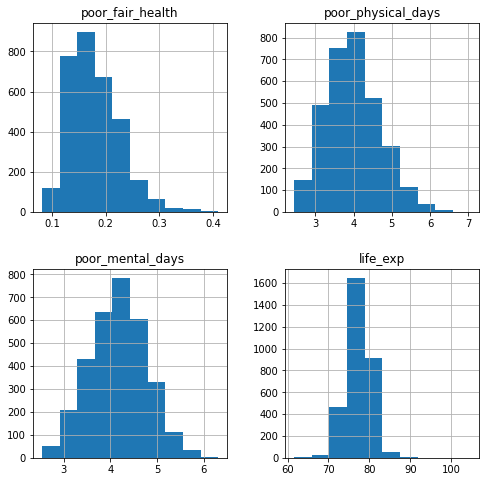

In [120]:
# look at distributions for the numeric variables
health_df[numeric_cols].hist(figsize=(8,8))
plt.show()

In [130]:
# basic descriptives
health_df[numeric_cols].describe().round(3)

,poor_fair_health,poor_physical_days,poor_mental_days,life_exp
count,3194.000,3194.000,3194.000,3121.000
mean,0.179,3.989,4.166,77.486
std,0.047,0.703,0.602,3.026
min,0.081,2.449,2.533,61.626
25%,0.143,3.473,3.747,75.571
50%,0.172,3.935,4.171,77.510
75%,0.209,4.439,4.574,79.369
max,0.410,7.062,6.314,104.740


In [132]:
# which places have max and min values of the 4 variables?
health_df.set_index('name')[numeric_cols].aggregate(['idxmin', 'idxmax'])

,poor_fair_health,poor_physical_days,poor_mental_days,life_exp
idxmin,Douglas County,Carver County,Aleutians West Census Area,Buffalo County
idxmax,Zavala County,Kusilvak Census Area,McDowell County,San Miguel County


In [145]:
# checking whether taking mean of country rows grouped by state
# matches the equivalent row for the state

In [144]:
state_means_df=health_df[-state_filter].groupby('state_abbreviation')[numeric_cols].mean()

In [146]:
state_means_df.loc['AL']

poor_fair_health       0.238164
poor_physical_days     4.960199
poor_mental_days       4.966114
life_exp              74.644740
Name: AL, dtype: float64

In [153]:
# row from original data frame for AL
health_df[health_df['fips5']=='1000'][numeric_cols]

,poor_fair_health,poor_physical_days,poor_mental_days,life_exp
2,0.220287,4.918052,4.939753,75.416194


<div class="alert alert-info">
    
* Hmm - kind of but not quite the same
    
* Seems like the best thing is to drop the national and state rows and work from the counties and create your own state level summaries
    
* You should adjust the code below
    
</div>

Becuase the health measures are that of poor health, I am making them negative to remind ourselves of that. 

<div class="alert alert-warning">

* I can understand why you might think to do this. However, these values are the proportion of the population in the county that have poor/fair helath so as that number increases then more people are sick etc.
    
    
* As your plots below show it may be easy to understand a postive proportion on x-axis, i.e. further right = more sick as opposed to the opposite

</div>

In [27]:
health_df['poor_fair_health'] = health_df['poor_fair_health'] * -1
health_df['poor_physical_days'] = health_df['poor_physical_days'] * -1
health_df['poor_mental_days'] = health_df['poor_mental_days'] * -1

In [28]:
# use relative not absolute file paths
health_df.to_csv(r'../data/health_clean.csv', index = False)

In [29]:
health_df_state = health_df.groupby('state_abbreviation')[['poor_fair_health', 'poor_physical_days', 'poor_mental_days', 'life_exp']].mean()

In [30]:
health_df_state.head()

,poor_fair_health,poor_physical_days,poor_mental_days,life_exp
state_abbreviation,,,,
AK,-0.169534,-3.951762,-3.620085,78.080936
AL,-0.237901,-4.959580,-4.965726,74.656085
AR,-0.233016,-4.767555,-4.771253,74.919770
AZ,-0.197933,-4.311024,-4.338000,78.607591
CA,-0.162036,-3.740474,-3.942800,80.330312


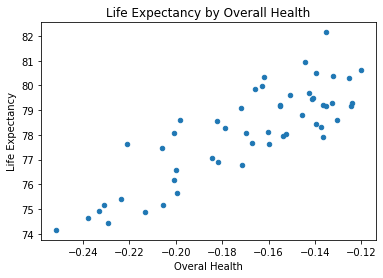

In [31]:
health_df_state.plot(kind='scatter', 
                     x = 'poor_fair_health', 
                     y = 'life_exp')
plt.xlabel("Overal Health")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy by Overall Health")
plt.show()

In [21]:
# line graph makes no sense for these two variables
# you want a scatter plot

health_df_state[['poor_fair_health', 'life_exp']].corr()

# actually looks like quite a strong negative association

# association is now positive as the measure was changed to negative values

,poor_fair_health,life_exp
poor_fair_health,1.000000,0.842367
life_exp,0.842367,1.000000


There is a strong positve correlation between overall health and life expectancy. 

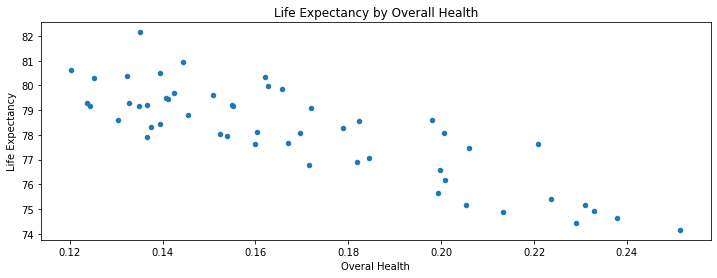

In [52]:
# flipping your values back to the original sign
# better shows the negative relationship
#  - as the proportion of the population with poor helath
#    increases the life expectancy in that state decreases


health_df_state.abs().plot(kind='scatter', 
                     x = 'poor_fair_health', 
                     y = 'life_exp')
plt.xlabel("Overal Health")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy by Overall Health")
plt.show()

<div class="alert alert-info">

* Can be useful to look at the max and min values and index values

</div>

In [58]:
health_df_state.abs().aggregate(['max', 'min'])

,poor_fair_health,poor_physical_days,poor_mental_days,life_exp
max,0.251460,5.329252,5.376755,82.150719
min,0.120379,2.885692,3.136575,74.155815


In [59]:
health_df_state.abs().aggregate(['idxmax', 'idxmin'])

,poor_fair_health,poor_physical_days,poor_mental_days,life_exp
idxmax,MS,WV,WV,HI
idxmin,CT,DC,SD,MS


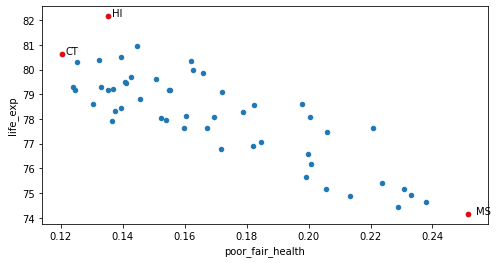

In [111]:
states_to_highlight = ['MS', 'CT', 'HI']

splot = health_df_state.abs().plot(kind='scatter', 
                     x = 'poor_fair_health', 
                     y = 'life_exp',
                     figsize=(8,4)
                                  )

highlights = health_df_state.abs().loc[states_to_highlight]


highlights.plot(kind='scatter',
                x = 'poor_fair_health', 
                y = 'life_exp',
                color='red',
                ax=splot
)

highlights.reset_index().apply(lambda r: plt.text(r['poor_fair_health']*1.01,
                                    r['life_exp'],
                                    r['state_abbreviation']
                                   ), axis=1)

plt.show()

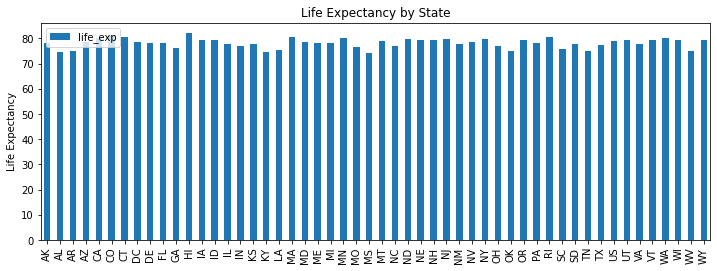

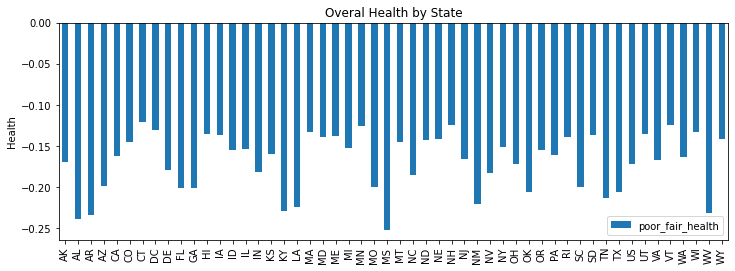

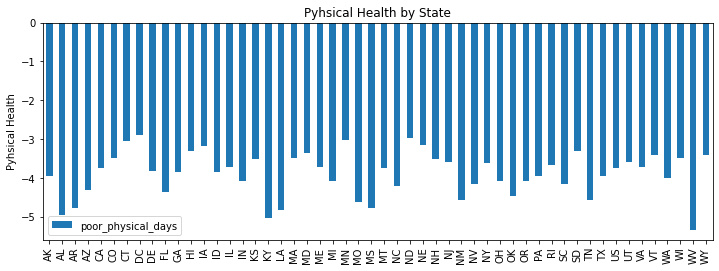

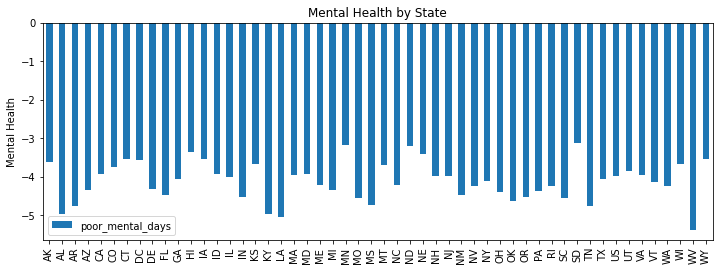

In [55]:
#plt.rcParams["figure.figsize"]=12,4

# can reset with
# plt.rcParams.setdefault("figure.figsize")

health_df_state.plot(kind='bar', 
                     y = 'life_exp',
                     figsize=(12,4)    # change the size of figure
                                       # on a plot basis not defaults
                    )

plt.xlabel("")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy by State")
plt.xticks(rotation = 90)
plt.show()
health_df_state.plot(kind='bar', y = 'poor_fair_health')
plt.xlabel("")
plt.ylabel("Health")
plt.title("Overal Health by State")
plt.xticks(rotation = 90)
plt.show()
health_df_state.plot(kind='bar', y = 'poor_physical_days')
plt.xlabel("")
plt.ylabel("Pyhsical Health")
plt.title("Pyhsical Health by State")
plt.xticks(rotation = 90)
plt.show()
health_df_state.plot(kind='bar', y = 'poor_mental_days')
plt.xlabel("")
plt.ylabel("Mental Health")
plt.title("Mental Health by State")
plt.xticks(rotation = 90)
plt.show()

From the four plots above, overall life expectancy does not seem to differ much between states. However, overall health, mental health, and physical health have larger ranges. 